In [1]:
from dataset_ import YOLODataset
from config import config
from torchinfo import summary
from models import YOLOv3
from loss import YoloLoss
import torch 
import torch.optim as optim
from tqdm import tqdm 
from utils import utils, plot
from torch.utils.data import DataLoader
import torch.nn.functional as F
import warnings
import pdb
%matplotlib inline
warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True


In [2]:
train_dataset = YOLODataset("/mnt/e/coco_mini/val_t.txt",config.ANCHORS,img_size=config.IMAGE_SIZE,transform=config.train_transforms,C=config.NUM_CLASSES)
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=1,
    num_workers=config.NUM_WORKERS,
    pin_memory=config.PIN_MEMORY,
    shuffle=True,
    drop_last=False,
)

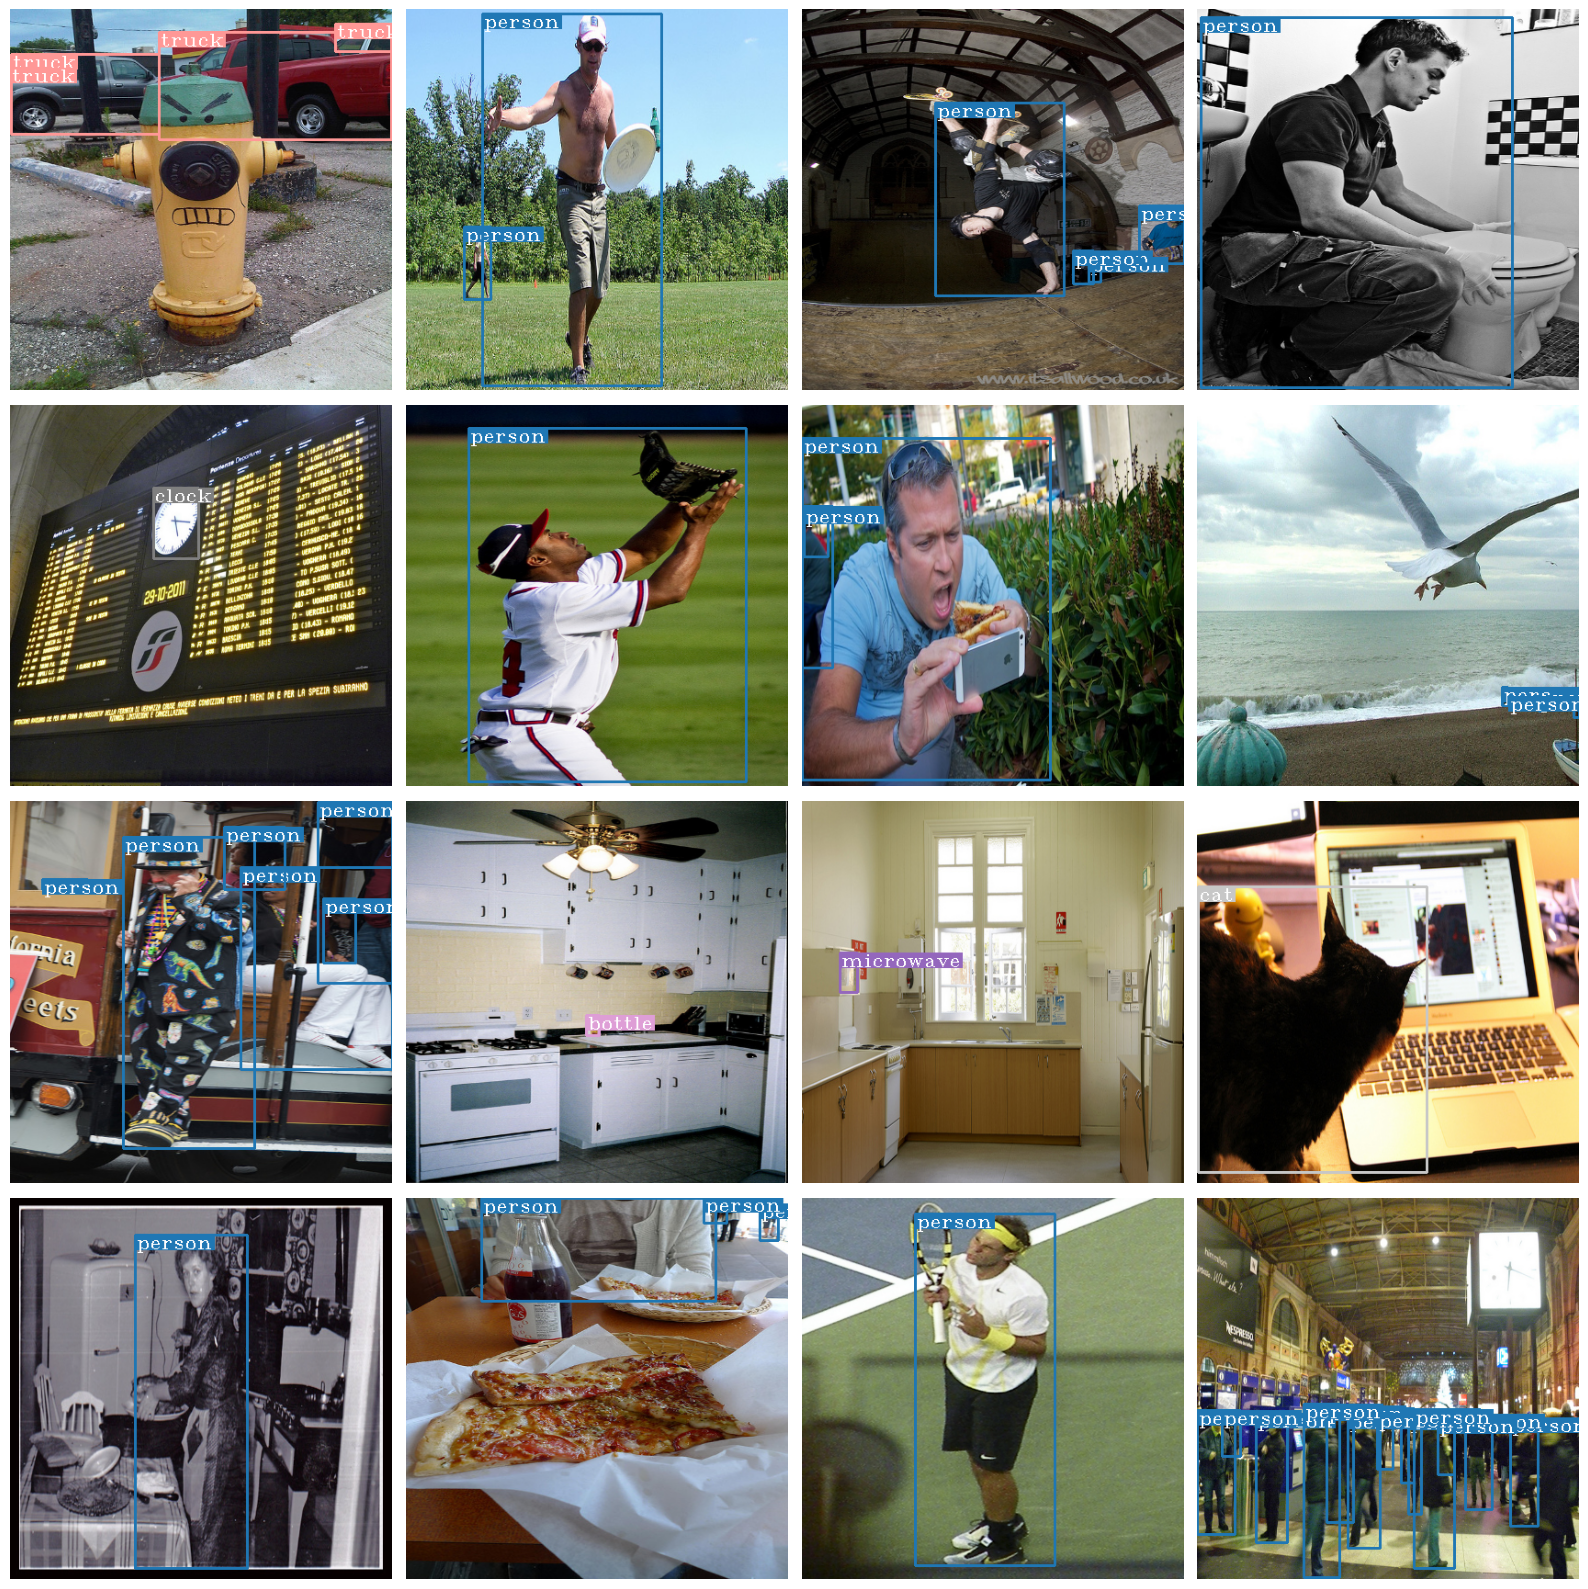

In [3]:
model = YOLOv3(config=config.model_net,n_classes=config.NUM_CLASSES).to(config.DEVICE) 
utils.plot_samples(model,train_loader,16,config,pred_plot=False)
